In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn as sl

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder    #ENCODING CATEGORICALS
from sklearn.model_selection import train_test_split #TO SPLIT DATA
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data=pd.read_csv("marketing_customer_analysis.csv")

In [3]:
data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8551,AZ90068,California,8193.160528,No,Basic,College,2/26/11,Employed,M,89219,Suburban,Single,73,12,9,4,2,Personal Auto,Personal L3,Offer2,Branch,350.400000,Four-Door Car,Medsize
5731,ZB82406,Oregon,6650.456653,No,Extended,Bachelor,2/27/11,Unemployed,F,0,Suburban,Single,99,16,65,2,3,Personal Auto,Personal L1,Offer2,Branch,712.800000,Four-Door Car,Small
3646,KD16729,Nevada,6645.928117,No,Extended,College,1/25/11,Employed,M,21144,Urban,Married,86,6,98,0,8,Personal Auto,Personal L2,Offer1,Branch,391.446775,Two-Door Car,Medsize
5933,WR53191,California,15120.212810,No,Extended,Bachelor,2/16/11,Employed,F,20656,Suburban,Single,130,15,5,0,2,Corporate Auto,Corporate L2,Offer1,Web,706.114237,SUV,Medsize
7989,BN45584,Oregon,4034.926461,No,Basic,College,2/23/11,Unemployed,F,0,Suburban,Single,112,8,28,0,1,Special Auto,Special L3,Offer3,Branch,806.400000,Sports Car,Medsize
2791,XC68458,California,6089.517361,No,Extended,Bachelor,1/20/11,Medical Leave,M,21832,Suburban,Single,84,29,39,0,3,Personal Auto,Personal L2,Offer1,Web,403.200000,Four-Door Car,Small
3961,TE44937,Oregon,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,11432,Suburban,Married,119,11,9,0,2,Personal Auto,Personal L2,Offer2,Agent,571.200000,SUV,Small
8508,GH48839,California,11790.496170,Yes,Basic,College,1/3/11,Retired,M,25251,Suburban,Divorced,66,13,43,0,2,Corporate Auto,Corporate L3,Offer2,Web,316.800000,Four-Door Car,Medsize
8719,KA67497,California,6385.617852,No,Basic,High School or Below,2/2/11,Unemployed,F,0,Suburban,Single,63,16,35,1,2,Personal Auto,Personal L3,Offer1,Agent,302.400000,Two-Door Car,Medsize
1648,SH51981,Washington,5246.057249,No,Basic,College,2/21/11,Employed,M,70301,Suburban,Divorced,67,7,43,0,7,Personal Auto,Personal L2,Offer3,Agent,328.942798,Four-Door Car,Small


In [4]:
#Show DataFrame info.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#changing columns names

data_cols=data.columns

In [6]:
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [7]:
data.columns=cols 

In [8]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [9]:
#Changing "employmentstatus" column to "employment_status"
data.rename(columns={"employmentstatus": "employment_status"}, inplace=True)

In [10]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [11]:
#Checking for Nulls
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
data["total_claim_amount"] = data ["total_claim_amount"].round()

Text(0.5, 1.0, 'Total Number of Responses')

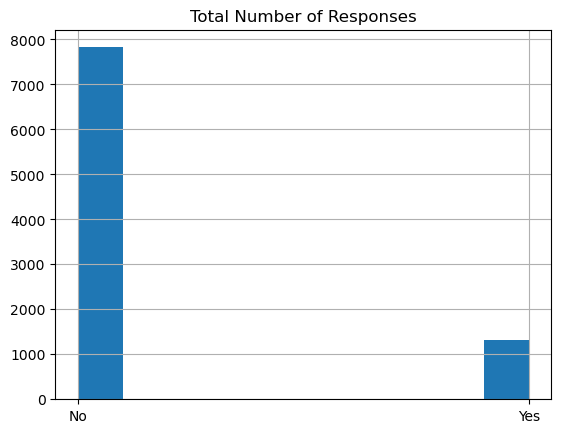

In [13]:
data["response"].hist()
plt.title("Total Number of Responses")

Text(0.5, 1.0, 'Total Number of Responses')

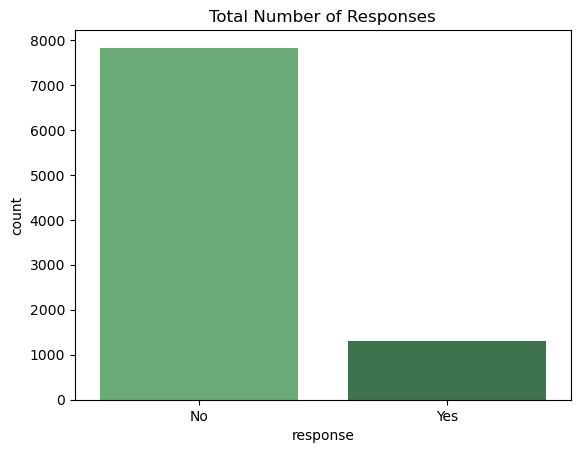

In [14]:
 #OR using seaborn
    
 sns.countplot(x="response",
 data=data,
 palette="Greens_d")
 plt.title("Total Number of Responses")

In [15]:
#1. Show a plot of the response rate by the sales channel.

# 1.1 Calculate RESPONSE RATE by SALES CHANNEL

new_df=data.groupby("sales_channel")["response"].value_counts(normalize=True)
new_df

sales_channel  response
Agent          No          0.808456
               Yes         0.191544
Branch         No          0.885469
               Yes         0.114531
Call Center    No          0.891218
               Yes         0.108782
Web            No          0.882264
               Yes         0.117736
Name: response, dtype: float64

In [16]:
# 1.2 Multiplying new_df by 100 since normalizing the value counts sets everything equal to 1 instead to 100.
# also resetting index will create a dataframe with 3 columns.

new_df=new_df.mul(100).rename("percent").reset_index()

In [17]:
new_df

,sales_channel,response,percent
0,Agent,No,80.845557
1,Agent,Yes,19.154443
2,Branch,No,88.546942
3,Branch,Yes,11.453058
4,Call Center,No,89.121813
5,Call Center,Yes,10.878187
6,Web,No,88.226415
7,Web,Yes,11.773585


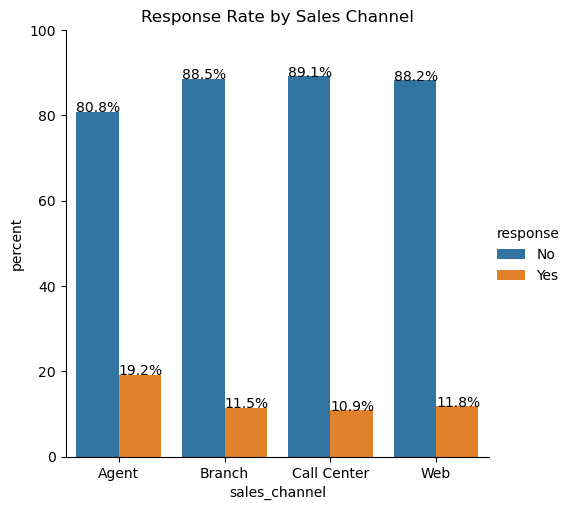

In [18]:
#1.3 Creating the plot

g = sns.catplot(x="sales_channel",y="percent", hue="response", kind="bar", data=new_df)
g.ax.set_ylim(0,100)   #sets the limit of y axis from 0-100
plt.title("Response Rate by Sales Channel")

#LOOP through each bar in the graph to add the percentage value
for p in g.ax.patches:
    txt=str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt)

In [19]:
#Show a plot of the response rate by the total claim amount
 
new_df2= data.groupby("total_claim_amount")["response"].value_counts(normalize=True)
new_df2

total_claim_amount  response
0.0                 No          1.0
1.0                 No          1.0
2.0                 No          1.0
3.0                 No          1.0
4.0                 No          1.0
                               ... 
2345.0              No          1.0
2453.0              No          1.0
2552.0              No          1.0
2760.0              No          1.0
2893.0              No          1.0
Name: response, Length: 1336, dtype: float64

In [20]:
new_df2=new_df2.mul(100).rename("percent").reset_index()
new_df2

,total_claim_amount,response,percent
0,0.0,No,100.0
1,1.0,No,100.0
2,2.0,No,100.0
3,3.0,No,100.0
4,4.0,No,100.0
...,...,...,...
1331,2345.0,No,100.0
1332,2453.0,No,100.0
1333,2552.0,No,100.0
1334,2760.0,No,100.0


In [43]:
# create a new column with bins
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]

new_df2['total_claim_amount_bins'] = pd.cut(new_df2['total_claim_amount'], bins)
new_df2

,total_claim_amount,response,percent,bins,total_claim_amount_bins
0,0.0,No,100.0,NaN,NaN
1,1.0,No,100.0,"(0.0, 500.0]","(0.0, 500.0]"
2,2.0,No,100.0,"(0.0, 500.0]","(0.0, 500.0]"
3,3.0,No,100.0,"(0.0, 500.0]","(0.0, 500.0]"
4,4.0,No,100.0,"(0.0, 500.0]","(0.0, 500.0]"
...,...,...,...,...,...
1331,2345.0,No,100.0,"(2000.0, 2500.0]","(2000.0, 2500.0]"
1332,2453.0,No,100.0,"(2000.0, 2500.0]","(2000.0, 2500.0]"
1333,2552.0,No,100.0,"(2500.0, 3000.0]","(2500.0, 3000.0]"
1334,2760.0,No,100.0,"(2500.0, 3000.0]","(2500.0, 3000.0]"


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


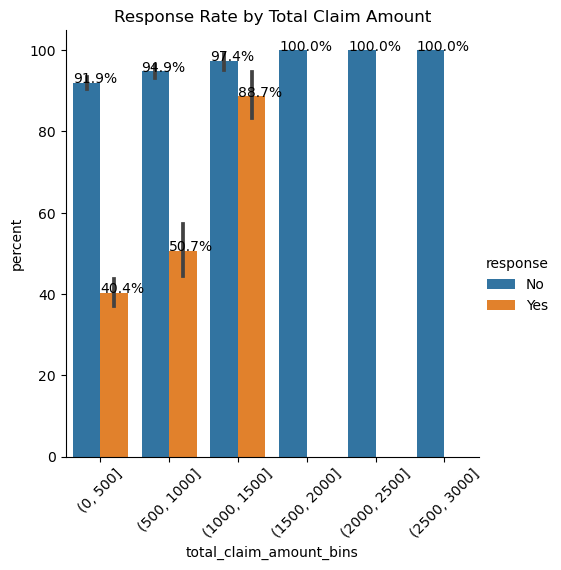

In [44]:
g2 = sns.catplot(x="total_claim_amount_bins",y="percent", hue="response", kind="bar", data=new_df2)
g.ax.set_ylim(0,100)   #sets the limit of y axis from 0-100
plt.title("Response Rate by Total Claim Amount")
plt.xticks(rotation=45)

for p in g2.ax.patches:
    txt=str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g2.ax.text(txt_x, txt_y, txt)
g2

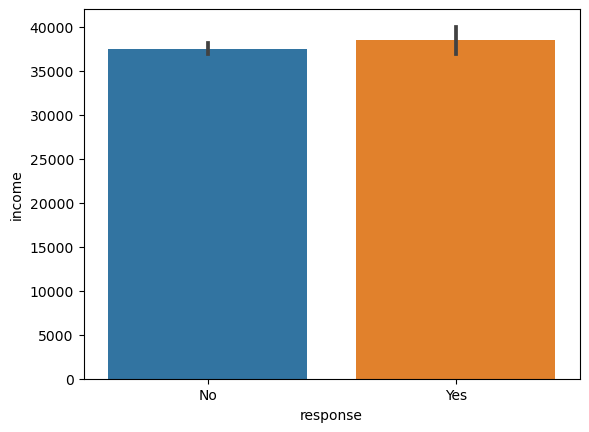

In [41]:
#Show a plot of the response rate by income.
g2=sns.barplot(x='response', y ="income", data = data)  
plt.show()

# customer_analysis_round_4

In [ ]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [ ]:
data.dtypes

In [ ]:
#Dataframe with numerical data

numerical = data.select_dtypes(include=np.number)
numerical

In [ ]:
#Dataframe with categorical data

categorical = data.select_dtypes(include=np.object)
categorical

In [ ]:
#Use seaborn library to construct distribution plots for the numerical variables
#Checking distribution(Skewness) of numerical variables using seaborn

for column in numerical.columns:
    sns.distplot(data[column])
    plt.show()

In [ ]:
#Use Matplotlib to construct histograms

numerical.hist()
plt.show

In [ ]:
#Do the distributions for different numerical variables look like a normal distribution
#(StandardScaler: For each feature to have mean=0 and standard-deviation = 1.)

transformer = StandardScaler().fit_transform(numerical)
transformer

In [ ]:
#Transforming "transformer" array to a DataFrame

numerical_stand = pd.DataFrame(transformer, columns = numerical.columns)
numerical_stand.head()

In [ ]:
#Distribution with transformed data

for column in numerical_stand.columns:
    sns.distplot(numerical_stand[column])
    plt.show()

In [ ]:
#OR
sns.pairplot(numerical)


In [ ]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

#1. SPLITTING DATA: Separate the Target "total_claim_amount" from numerical dataset into Y.

y = numerical["total_claim_amount"]
X = numerical.drop(["total_claim_amount"], axis=1)
X

In [ ]:
#Creating a Correlation plot:

correlations_matrix = X.corr(method="spearman")
correlations_matrix

In [ ]:
sns.plot = sns.heatmap(correlations_matrix, annot=True)
plt.show()

# The highest correlation is 0.49 (between "customer_lifetime_value" and "number of policies").

In [ ]:
mask = np.zeros_like(correlations_matrix)  

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

# The highest correlation is 0.49 (between "customer_lifetime_value" and "number of policies"), therefore below 0.9.

# Customer_analysis_round_5

In [ ]:
# X-y split

y = numerical["total_claim_amount"]
X = numerical.drop(["total_claim_amount"], axis=1)   #X IS WHAT WE WANT TO NORMALIZE
X

In [ ]:
# Normalize numerical Data

In [ ]:

#MinMaxScaler(): scaling data to the range of 0 and 1.

X_scale = MinMaxScaler().fit(X) 
x_minmax = X_scale.transform(X) 
x_minmax


In [ ]:
#transform x_minmax to a DataFrame

X_normalize = pd.DataFrame(x_minmax,columns=X.columns)
X_normalize.head() 

In [ ]:
for column in X_normalize.columns:
    sns.distplot(X_normalize[column])
    plt.show()

# Customer_analysis_round_6


In [ ]:
# One Hot/Label Encoding (categorical).
categorical.head()

In [ ]:
#Drop customer and effective_to_date column first
categorical2 = categorical.drop (columns = ["customer", "effective_to_date"])
categorical2.head()

In [ ]:
#Encoding using ONEHOTENCODER

#encoder = OneHotEncoder(handle_unknown='error', drop='first')
#encoder.fit(categorical2)

In [ ]:
#encoded = encoder.transform(categorical2).toarray() 
#cat_encoded = pd.DataFrame(encoded)
#cat_encoded.head()

In [ ]:
#Encoding with GET_DUMMIES

categorical2 = pd.get_dummies(categorical2, drop_first = True)
categorical2

In [ ]:
#Concat DataFrames
dataconc = pd.concat([numerical, categorical2], axis = 1)
dataconc

In [ ]:
# Train-test split. Spliting TARAGET and INDEPENDENT Variables, one for training and one for testing.


X_train, X_test, y_train , y_test = train_test_split(categorical2, y, test_size=0.3, random_state=42)


In [ ]:
#Apply Linear Regression.

#Training now just the data set, not the test.

model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
# Model Validation

# 1. Description:
  #  R2
  #  MSE
  #  RMSE
  #  MAE

In [ ]:
#Predicting on X_test

predictions  = model.predict(X_test)
predictions

In [ ]:
y_test

In [ ]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

In [ ]:
numerical["total_claim_amount"].describe()

In [ ]:
#R2 is 0,74 therefore close to 1. #The closer the r-squared value is to 1, the better the fit.

#RMSE 144. Min value is 0, and max value is 2894 therefore 144 is good.   

#RMSE estimates the deviation of the actual y-values from the regression line. RMSE is a metric to evalate model performance.